# Build a network to classify Reuters newswires into 46 mutually
exclusive topics

In [0]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(
num_words=10000)

In [0]:
import numpy as np
def vectorize_suquences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
    return results

In [0]:
x_train=vectorize_suquences(x_train)
x_test=vectorize_suquences(x_test)

In [110]:
print(y_train.shape,y_test.shape,x_train.shape,x_test.shape)

(8982,) (2246,) (8982, 10000) (2246, 10000)


In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
    return results

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [174]:
print(y_train.shape,y_test.shape,x_train.shape,x_test.shape)

(8982, 46) (2246, 46) (8982, 10000) (2246, 10000)


In [0]:
from keras.initializers import glorot_uniform

In [0]:
# 46 MULTI CLASSES so 46 softmax
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,),
                kernel_initializer=glorot_uniform(seed=66)))
model.add(Dense(64,activation='relu',
                kernel_initializer=glorot_uniform(seed=66)))
model.add(Dense(46,activation='softmax',
                kernel_initializer=glorot_uniform(seed=66)))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Validating your approach
Let’s set apart 1,000 samples in the training data to use as a validation set.

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

In [67]:
len(y_train)

2246

In [0]:
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

In [198]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 119us/step - loss: 3.8118 - accuracy: 0.0561 - val_loss: 3.7979 - val_accuracy: 0.0470
Epoch 2/9
7982/7982 [==============================] - 1s 113us/step - loss: 3.7880 - accuracy: 0.1983 - val_loss: 3.7770 - val_accuracy: 0.3530
Epoch 3/9
7982/7982 [==============================] - 1s 111us/step - loss: 3.7676 - accuracy: 0.3108 - val_loss: 3.7570 - val_accuracy: 0.2220
Epoch 4/9
7982/7982 [==============================] - 1s 111us/step - loss: 3.7477 - accuracy: 0.2481 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/9
7982/7982 [==============================] - 1s 109us/step - loss: 3.7280 - accuracy: 0.3225 - val_loss: 3.7178 - val_accuracy: 0.2220
Epoch 6/9
7982/7982 [==============================] - 1s 110us/step - loss: 3.7084 - accuracy: 0.2709 - val_loss: 3.6984 - val_accuracy: 0.3530
Epoch 7/9
7982/7982 [==============================] - 1s 113us/step - loss: 3.689

In [199]:
model.evaluate(x_test,y_test)

2246/2246 [==============================] - 0s 75us/step


[3.6431996172703704, 0.36197686195373535]

In [0]:
predictions=model.predict(x_test)

In [206]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [207]:
predictions[1]

array([0.02066464, 0.02759047, 0.0206991 , 0.02791118, 0.02790122,
       0.02058509, 0.0206517 , 0.02059118, 0.02135371, 0.02078874,
       0.02108149, 0.0273026 , 0.02063742, 0.022353  , 0.02058662,
       0.02058902, 0.0276548 , 0.02062723, 0.02071331, 0.02770378,
       0.02645959, 0.02087379, 0.02057416, 0.02058934, 0.02069562,
       0.02087169, 0.02059948, 0.02058878, 0.02063317, 0.02059684,
       0.02060723, 0.02062948, 0.02058446, 0.02058123, 0.02062571,
       0.02057377, 0.02063533, 0.02057534, 0.0205881 , 0.02058063,
       0.02060858, 0.02058895, 0.02057741, 0.02060401, 0.02059174,
       0.02057924], dtype=float32)

In [208]:
np.sum(predictions[1])

1.0000001

In [209]:
np.argmax(predictions[1])

3

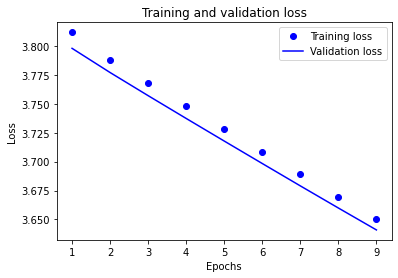

In [200]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

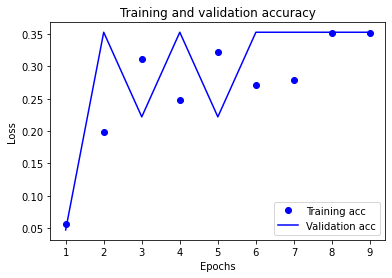

In [201]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)



In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [154]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/step - loss: 3.8120 - accuracy: 0.1908 - val_loss: 3.7980 - val_accuracy: 0.2220
Epoch 2/20
7982/7982 [==============================] - 1s 102us/step - loss: 3.7882 - accuracy: 0.2164 - val_loss: 3.7771 - val_accuracy: 0.2220
Epoch 3/20
7982/7982 [==============================] - 1s 103us/step - loss: 3.7678 - accuracy: 0.2164 - val_loss: 3.7572 - val_accuracy: 0.2220
Epoch 4/20
7982/7982 [==============================] - 1s 101us/step - loss: 3.7479 - accuracy: 0.2164 - val_loss: 3.7375 - val_accuracy: 0.2220
Epoch 5/20
7982/7982 [==============================] - 1s 103us/step - loss: 3.7282 - accuracy: 0.2164 - val_loss: 3.7179 - val_accuracy: 0.2220
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 3.7085 - accuracy: 0.2461 - val_loss: 3.6984 - val_accuracy: 0.2220
Epoch 7/20
7982/7982 [==============================] - 1s 103us/step - loss

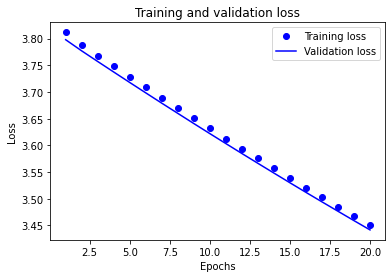

In [155]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [157]:
for i in history.history.keys():
  print(i)

val_loss
val_accuracy
loss
accuracy


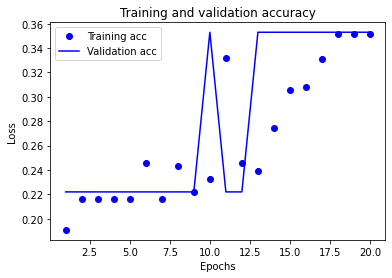

In [159]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [165]:
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 114us/step - loss: 3.8121 - accuracy: 0.0492 - val_loss: 3.7982 - val_accuracy: 0.0470
Epoch 2/9
7982/7982 [==============================] - 1s 106us/step - loss: 3.7884 - accuracy: 0.0606 - val_loss: 3.7772 - val_accuracy: 0.0480
Epoch 3/9
7982/7982 [==============================] - 1s 106us/step - loss: 3.7679 - accuracy: 0.2715 - val_loss: 3.7572 - val_accuracy: 0.3540
Epoch 4/9
7982/7982 [==============================] - 1s 107us/step - loss: 3.7479 - accuracy: 0.3514 - val_loss: 3.7374 - val_accuracy: 0.3540
Epoch 5/9
7982/7982 [==============================] - 1s 107us/step - loss: 3.7282 - accuracy: 0.3514 - val_loss: 3.7179 - val_accuracy: 0.3540
Epoch 6/9
7982/7982 [==============================] - 1s 112us/step - loss: 3.7086 - accuracy: 0.3514 - val_loss: 3.6985 - val_accuracy: 0.3540
Epoch 7/9
7982/7982 [==============================] - 1s 108us/step - loss: 3.689

In [202]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 81us/step


In [203]:
results

[3.6431996172703704, 0.36197686195373535]